## Task 2: Drug Classification

Download the BBC dataset provided on Moodle. The dataset, created by [Greene and Cunningham, 2006], is a collection of 2225 documents from the BBC news website already categorized into 5 classes: business, entertainment, politics, sport, and tech."

**2. Load the dataset in Python**

In [1]:
import pandas as pd
data_df = pd.read_csv("../data/drug200.csv")
data_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


**3. Plot the distribution of the instances in each class and store the graphic in a file called drug-distribution.pdf. You can use matplotlib.pyplot. This pre-analysis will allow you to determine if the classes are balanced, and which metric is more appropriate to use to evaluate the performance of your classifier.**

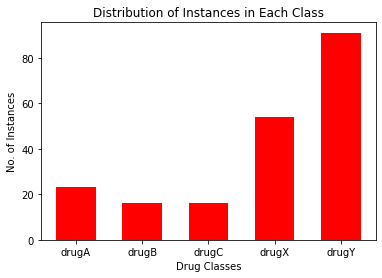

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#drug_data = data_df.to_numpy()

drug_dict = dict()

drug_dict['drugA'] = len(data_df.loc[data_df['Drug']== 'drugA'])
drug_dict['drugB'] = len(data_df.loc[data_df['Drug']== 'drugB'])
drug_dict['drugC'] = len(data_df.loc[data_df['Drug']== 'drugC'])
drug_dict['drugX'] = len(data_df.loc[data_df['Drug']== 'drugX'])
drug_dict['drugY'] = len(data_df.loc[data_df['Drug']== 'drugY'])

classes = list(drug_dict.keys())
instances = list(drug_dict.values())

plt.bar(classes, instances, color = 'red', width = 0.6)

plt.xlabel("Drug Classes")
plt.ylabel("No. of Instances")
plt.title("Distribution of Instances in Each Class")
plt.savefig("../output/drug-distribution.pdf") 
plt.show()





**4. Convert all ordinal and nominal features in numerical format. Make sure that your converted format respects the ordering of ordinal features, and does not introduce any ordering for nominal features. You may want to take a look at pandas.get dummies and pandas.Categorical to do this.**

In [3]:
#Converts nominal column "Sex" to numerical format using pandas.get_dummies function
data_df = pd.get_dummies(data_df, columns=['Sex'])

#Converts ordinal column "BP" to numerical format using pandas.Categorical function
data_df.BP = pd.Categorical(data_df.BP,['LOW','NORMAL','HIGH'],ordered=True)
data_df.BP = data_df.BP.cat.codes

#Converts ordinal column "Cholestrol" to numerical format using pandas.Categorical function
data_df.Cholesterol = pd.Categorical(data_df.Cholesterol,['NORMAL','HIGH'],ordered=True)
data_df.Cholesterol = data_df.Cholesterol.cat.codes

data_df.head()


,Age,BP,Cholesterol,Na_to_K,Drug,Sex_F,Sex_M
0,23,2,1,25.355,drugY,1,0
1,47,0,1,13.093,drugC,0,1
2,47,0,1,10.114,drugC,0,1
3,28,1,1,7.798,drugX,1,0
4,61,0,1,18.043,drugY,1,0


**5. Split the dataset using train test split using the default parameter values.**

In [4]:
from sklearn.model_selection import train_test_split

#Seperates ouput (classes) column from features columns
df_output = data_df.Drug 
df_samples = data_df.drop(columns=['Drug'])

X_train, X_test, y_train, y_test = train_test_split(df_samples, df_output)


**6. Run 6 different classifiers**

**a) NB: a Gaussian Naive Bayes Classifier (naive bayes.GaussianNB) with the default parameters.**

In [5]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
#y_pred_gnb

print("Number of mislabeled instances out of a total %d test instances : %d" % (X_test.shape[0], (y_test != y_pred_gnb).sum()))


Number of mislabeled instances out of a total 50 test instances : 6


**b) Base-DT: a Decision Tree (tree.DecisionTreeClassifier) with the default parameters.**

In [6]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
y_pred_tree = clf.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled instances out of a total %d test instances : %d" % (X_test.shape[0], (y_test != y_pred_tree).sum()))



Number of mislabeled instances out of a total 50 test instances : 0


**c) Top-DT: A Better Performing Decision Tree found using GridSearchCV**

In [7]:
from sklearn.model_selection import GridSearchCV


param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[5,10],
    "min_samples_split":[2,4,6]
}

grid_tree = GridSearchCV(clf,param_grid=param_dist)

grid_tree.fit(X_train,y_train)

#Creates new model with best obtained hyper parameters 
clf_grid = DecisionTreeClassifier(criterion=grid_tree.best_params_['criterion'], 
                                  max_depth=grid_tree.best_params_['max_depth'],
                                 min_samples_split=grid_tree.best_params_['min_samples_split'])


y_pred_tree_grid = clf_grid.fit(X_train, y_train).predict(X_test)

print("Best hyper-parameter values determined by GridSearch:" + str(grid_tree.best_params_) + "\n")
print("Number of mislabeled instances out of a total %d test instances : %d" % (X_test.shape[0], (y_test != y_pred_tree_grid).sum()))



Best hyper-parameter values determined by GridSearch:{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

Number of mislabeled instances out of a total 50 test instances : 0


**d) PER: A Perceptron (linear model.Perceptron), with default parameter values.**

In [8]:
from sklearn.linear_model import Perceptron

clf_perc = Perceptron()

y_pred_perc = clf_perc.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled instances out of a total %d test instances : %d" % (X_test.shape[0], (y_test != y_pred_perc).sum()))


Number of mislabeled instances out of a total 50 test instances : 31


**e) Base-MLP: A Multi-Layered Perceptron (neural network.MLPClassifier) with 1 hidden layer of 100 neurons, sigmoid/logistic as activation function, stochastic gradient descent, and default values for the rest of the parameters.**

In [9]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(activation = 'logistic', solver = 'sgd')

y_pred_mlp = clf_mlp.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled instances out of a total %d test instances : %d" % (X_test.shape[0], (y_test != y_pred_mlp).sum()))


Number of mislabeled instances out of a total 50 test instances : 24


/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**f) Top-MLP: A better performing Multi-Layered Perceptron found using grid search.**

In [10]:
param_mlp={
    "activation":["identity","logistic","tanh","relu"],
    "solver":["adam","sgd"],
    "hidden_layer_sizes":[(30,50),(10,10,10)]
}

clf_mlp_base = MLPClassifier()

grid_mlp = GridSearchCV(clf_mlp_base,param_grid=param_mlp)

grid_mlp.fit(X_train,y_train)

#Creates new model with best obtained hyper parameters 
clf_mlp_grid = MLPClassifier(activation=grid_mlp.best_params_['activation'], 
                                solver=grid_mlp.best_params_['solver'],
                               hidden_layer_sizes=grid_mlp.best_params_['hidden_layer_sizes'])

y_pred_mlp_grid = clf_mlp_grid.fit(X_train, y_train).predict(X_test)

print("Numbers of mislabeled instances out of a total %d test instances : %d" % (X_test.shape[0], (y_test != y_pred_mlp_grid).sum()))





/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum ite

/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum ite

/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum ite

Numbers of mislabeled instances out of a total 50 test instances : 11


/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**For each of the 6 classifier above, append the following information in a file called drugs-performance.txt:**

**NB: Gaussian Naive Bayes**

**a) Clear seperator and a string clearly describing the model**

In [11]:
# Create files to be appended to
file_performance = open("../output/drug-performance.txt","a")
file_discussion = open("../output/drug-discussion.txt","a")

# Clear contents
file_performance.truncate(0)
file_discussion.truncate(0)

# Seperator
def write_seperator_to_file():
    file_performance.write("\n---------------------------------------------------------------------\n")

# Writes model's name
def write_model_name_to_file(model_name):
    
    file_performance.write("\n (a) **** {model_name} ****\n\n".format(model_name=model_name))
    file_performance.write("\n")
    
write_seperator_to_file()
write_model_name_to_file("NB: Gaussian Naive Bayes")


**b) Confusion Matrix**

In [12]:
from sklearn.metrics import confusion_matrix

cf_matrix_gnb = confusion_matrix(y_test,y_pred_gnb)

def print_confusion_matrix(cf_matrix):
    print('Confusion Matrix:\n {cf_matrix}'.format(cf_matrix=cf_matrix))
    
def write_confusion_matrix_to_file(cf_matrix):
    file_performance.write("(b) Confusion Matrix" + "\n\n")
    np.savetxt(file_performance, X=cf_matrix.astype(int), fmt ='%i\t')
    file_performance.write("\n")
    
print_confusion_matrix(cf_matrix_gnb)
write_confusion_matrix_to_file(cf_matrix_gnb)


Confusion Matrix:
 [[ 7  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 11  1]
 [ 3  0  2  0 18]]


**c) Precision, Recall and F1-measure**

In [13]:
from sklearn import metrics

def print_classification_report(y_test, y_predicted):
    report = metrics.classification_report(y_test, y_predicted)
    print(report)
    
def write_classification_report_to_file(y_test, y_predicted):
    report = metrics.classification_report(y_test, y_predicted)
    file_performance.write("(c) Classification Report\n\n" + report)
    file_performance.write("\n")

#print(y_test)
#print(y_pred_gnb)
    
print_classification_report(y_test, y_pred_gnb)
write_classification_report_to_file(y_test, y_pred_gnb)

              precision    recall  f1-score   support

       drugA       0.70      1.00      0.82         7
       drugB       1.00      1.00      1.00         4
       drugC       0.67      1.00      0.80         4
       drugX       1.00      0.92      0.96        12
       drugY       0.95      0.78      0.86        23

    accuracy                           0.88        50
   macro avg       0.86      0.94      0.89        50
weighted avg       0.91      0.88      0.88        50



**d) Accuracy, Macro-average F1 and weighted-average F1**

In [14]:
from sklearn.metrics import accuracy_score, f1_score

def print_scores(y_test,y_predicted):
    print("Accuracy Score: ", accuracy_score(y_test, y_predicted))
    print("Macro-Average F1: ", f1_score(y_test, y_predicted, average="macro"))
    print("Weighted-Average F1: ", f1_score(y_test, y_predicted, average="weighted"))
    
def write_scores_to_file(y_test,y_predicted):
    file_performance.write("(d) Accuracy, Macro-Average F1 and Weighted-Average F1\n\n")
    file_performance.write("Accuracy Score: " + str(accuracy_score(y_test, y_predicted)) + "\n")
    file_performance.write("Macro-Average F1: " + str(f1_score(y_test, y_predicted, average="macro")) + "\n")
    file_performance.write("Weighted-Average F1: " + str(f1_score(y_test, y_predicted, average="weighted")) + "\n")
    file_performance.write("\n")
    
print_scores(y_test, y_pred_gnb)
write_scores_to_file(y_test,y_pred_gnb)

Accuracy Score:  0.88
Macro-Average F1:  0.8874388016075996
Weighted-Average F1:  0.8831450493240774


**Base-DT: Decision Tree**

**a) Model Description**

In [15]:
write_seperator_to_file()
write_model_name_to_file("Base-DT: Decision Tree")

**b) Confusion Matrix**

In [16]:
cf_matrix_tree = confusion_matrix(y_test,y_pred_tree)

print_confusion_matrix(cf_matrix_tree)
write_confusion_matrix_to_file(cf_matrix_tree)

Confusion Matrix:
 [[ 7  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 23]]


**c) Precision, Recall and F1-measure**

In [17]:
print_classification_report(y_test, y_pred_tree)
write_classification_report_to_file(y_test, y_pred_tree)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        12
       drugY       1.00      1.00      1.00        23

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



**d) Accuracy, Macro-average F1 and weighted-average F1**

In [18]:
print_scores(y_test, y_pred_tree)
write_scores_to_file(y_test,y_pred_tree)

Accuracy Score:  1.0
Macro-Average F1:  1.0
Weighted-Average F1:  1.0


**Top-DT: Better performing Decision tree with GridSearch**

**a) Model Description**

In [19]:
def write_hyper_parameters_to_file(model):
    file_performance.write("Best hyper-parameter values determined by GridSearch:" + str(model.best_params_) + "\n\n")

write_seperator_to_file()
write_model_name_to_file("Top-DT: Better Performing Decision Tree with GridSearch")
write_hyper_parameters_to_file(grid_tree)


**b) Confusion Matrix**

In [20]:
cf_matrix_tree_grid = confusion_matrix(y_test,y_pred_tree_grid)

print_confusion_matrix(cf_matrix_tree_grid)
write_confusion_matrix_to_file(cf_matrix_tree_grid)

Confusion Matrix:
 [[ 7  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 23]]


**c) Precision, Recall and F1-measure**

In [21]:
print_classification_report(y_test, y_pred_tree_grid)
write_classification_report_to_file(y_test, y_pred_tree_grid)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        12
       drugY       1.00      1.00      1.00        23

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



**d) Accuracy, Macro-average F1 and weighted-average F1**

In [22]:
print_scores(y_test, y_pred_tree_grid)
write_scores_to_file(y_test,y_pred_tree_grid)

Accuracy Score:  1.0
Macro-Average F1:  1.0
Weighted-Average F1:  1.0


**PER: Perceptron**

**a) Model Description**

In [23]:
write_seperator_to_file()
write_model_name_to_file("PER: Perceptron")

**b) Confusion Matrix**

In [24]:
cf_matrix_perc = confusion_matrix(y_test,y_pred_perc)

print_confusion_matrix(cf_matrix_perc)
write_confusion_matrix_to_file(cf_matrix_perc)

Confusion Matrix:
 [[ 0  0  0  7  0]
 [ 0  0  0  4  0]
 [ 0  0  0  3  1]
 [ 0  0  0  9  3]
 [ 1  0  0 12 10]]


**c) Precision, Recall and F1-measure**

In [25]:
print_classification_report(y_test, y_pred_perc)
write_classification_report_to_file(y_test, y_pred_perc)

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         7
       drugB       0.00      0.00      0.00         4
       drugC       0.00      0.00      0.00         4
       drugX       0.26      0.75      0.38        12
       drugY       0.71      0.43      0.54        23

    accuracy                           0.38        50
   macro avg       0.19      0.24      0.18        50
weighted avg       0.39      0.38      0.34        50



/Users/gianlucalepore/opt/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**d) Accuracy, Macro-average F1 and weighted-average F1**

In [26]:
print_scores(y_test, y_pred_perc)
write_scores_to_file(y_test,y_pred_perc)

Accuracy Score:  0.38
Macro-Average F1:  0.18470385278895915
Weighted-Average F1:  0.34056354226566987


**Base-MLP: A Multi-Layered Perceptron**

**a) Model Description**

In [27]:
write_seperator_to_file()
write_model_name_to_file("Base-MLP: A Multi-Layered Perceptron")

file_performance.write("Selected Hyper-parameter values:" + "\n\n")
file_performance.write("Activation = " + clf_mlp.activation + "\n")
file_performance.write("Solver = " + clf_mlp.solver + "\n\n")
 

14

**b) Confusion Matrix**

In [28]:
cf_matrix_mlp = confusion_matrix(y_test,y_pred_mlp)

print_confusion_matrix(cf_matrix_mlp)
write_confusion_matrix_to_file(cf_matrix_mlp)

Confusion Matrix:
 [[ 0  0  0  1  6]
 [ 0  0  0  4  0]
 [ 0  0  0  2  2]
 [ 0  0  0  5  7]
 [ 0  0  0  2 21]]


**c) Precision, Recall and F1-measure**

In [29]:
print_classification_report(y_test, y_pred_mlp)
write_classification_report_to_file(y_test, y_pred_mlp)

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         7
       drugB       0.00      0.00      0.00         4
       drugC       0.00      0.00      0.00         4
       drugX       0.36      0.42      0.38        12
       drugY       0.58      0.91      0.71        23

    accuracy                           0.52        50
   macro avg       0.19      0.27      0.22        50
weighted avg       0.35      0.52      0.42        50



**d) Accuracy, Macro-average F1 and weighted-average F1**

In [30]:
print_scores(y_test, y_pred_mlp)
write_scores_to_file(y_test,y_pred_mlp)

Accuracy Score:  0.52
Macro-Average F1:  0.21929595827900913
Weighted-Average F1:  0.41976531942633644


**Top MLP: Better Performing Multi-Layered Perceptron with GridSearch**

**a) Model Description**

In [31]:
write_seperator_to_file()
write_model_name_to_file("Top-DT: Better Performing Decision Tree with GridSearch")
write_hyper_parameters_to_file(grid_mlp)

**b) Confusion Matrix**

In [32]:
cf_matrix_mlp_grid = confusion_matrix(y_test,y_pred_mlp_grid)

print_confusion_matrix(cf_matrix_mlp_grid)
write_confusion_matrix_to_file(cf_matrix_mlp_grid)

Confusion Matrix:
 [[ 7  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  0  2  2]
 [ 0  0  0  6  6]
 [ 0  0  0  1 22]]


**c) Precision, Recall and F1-measure**

In [33]:
print_classification_report(y_test, y_pred_mlp_grid)
write_classification_report_to_file(y_test, y_pred_mlp_grid)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.00      0.00      0.00         4
       drugX       0.67      0.50      0.57        12
       drugY       0.73      0.96      0.83        23

    accuracy                           0.78        50
   macro avg       0.68      0.69      0.68        50
weighted avg       0.72      0.78      0.74        50



**d) Accuracy, Macro-average F1 and weighted-average F1**

In [34]:
print_scores(y_test, y_pred_mlp_grid)
write_scores_to_file(y_test,y_pred_mlp_grid)

Accuracy Score:  0.78
Macro-Average F1:  0.680323450134771
Weighted-Average F1:  0.7390296495956874


**8. Redo steps 6, 10 times for each model and append the average accuracy, average macro-average F1, av- erage weighted-average F1 as well as the standard deviation for the accuracy, the standard deviation of the macro-average F1, and the standard deviation of the weighted-average F1 at the end of the file drugs-performance.txt.**

In [35]:
from statistics import mean,stdev

def gaussianNB_classifier():
    gnb = GaussianNB()
    y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
    return y_pred_gnb

def tree_classifier():
    clf = DecisionTreeClassifier()
    y_pred_tree = clf.fit(X_train, y_train).predict(X_test)
    return y_pred_tree

def tree_grid_classifier():
    param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[5,10],
    "min_samples_split":[2,4,6]
}
    grid_tree = GridSearchCV(clf,param_grid=param_dist)
    grid_tree.fit(X_train,y_train)
    clf_grid = DecisionTreeClassifier(criterion=grid_tree.best_params_['criterion'], 
                                  max_depth=grid_tree.best_params_['max_depth'],
                                 min_samples_split=grid_tree.best_params_['min_samples_split'])
    y_pred_tree_grid = clf_grid.fit(X_train, y_train).predict(X_test)
    return y_pred_tree_grid

def perceptron_classifier():
    clf_perc = Perceptron()
    y_pred_perc = clf_perc.fit(X_train, y_train).predict(X_test)
    return y_pred_perc

def mlp_classifier():
    clf_mlp = MLPClassifier(activation = 'logistic', solver = 'sgd')
    y_pred_mlp = clf_mlp.fit(X_train, y_train).predict(X_test)
    return y_pred_mlp

def mlp_grid_classifier():
    param_mlp={
    "activation":["identity","logistic","tanh","relu"],
    "solver":["adam","sgd"],
    "hidden_layer_sizes":[(30,50),(10,10,10)]
}
    clf_mlp_base = MLPClassifier()
    grid_mlp = GridSearchCV(clf_mlp_base,param_grid=param_mlp)
    grid_mlp.fit(X_train,y_train)
    clf_mlp_grid = MLPClassifier(activation=grid_mlp.best_params_['activation'], 
                                solver=grid_mlp.best_params_['solver'],
                               hidden_layer_sizes=grid_mlp.best_params_['hidden_layer_sizes'])
    y_pred_mlp_grid = clf_mlp_grid.fit(X_train, y_train).predict(X_test)
    return y_pred_mlp_grid

def compute_average_metrics(model):
    accuracies = []
    macro_f1 = []
    weighted_f1 = []
    
    for i in range(10):
        if model == "gaussian":
            y_pred = gaussianNB_classifier()
        elif model == "tree":
            y_pred = tree_classifier()
        elif model == "tree_grid":
            y_pred = tree_grid_classifier()
        elif model == "perceptron":
            y_pred = perceptron_classifier()
        elif model == "mlp":
            y_pred = mlp_classifier()
        elif model == "mlp_grid":
            y_pred = mlp_grid_classifier()
            
        accuracies.append(accuracy_score(y_test, y_pred))
        macro_f1.append(f1_score(y_test, y_pred, average="macro"))
        weighted_f1.append(f1_score(y_test, y_pred, average="weighted"))
        
    avg_accuracy = mean(accuracies)
    avg_macro_f1 = mean(macro_f1)
    avg_weighted_f1 = mean(weighted_f1)
        
    std_dev_accuracy = stdev(accuracies)
    std_dev_macro_f1 = stdev(macro_f1)
    std_dev_weighted_f1 = stdev(weighted_f1)
        
    metrics_dict = {"avg_accuracy" : avg_accuracy, "avg_macro_f1": avg_macro_f1, "avg_weighted_f1":avg_weighted_f1,
                       "std_dev_accuracy": std_dev_accuracy, "std_dev_macro_f1": std_dev_macro_f1, "std_dev_weighted_f1":std_dev_weighted_f1 }
        
    return metrics_dict

def write_metrics_to_file():
    
    write_seperator_to_file()
    file_performance.write("\n\n" + "Listed below are the averages and standard deviations of accuracy, macro-average F1 and weighted average for each classifier after 10 runs" + "\n\n" )
    file_performance.write("GaussianNB:\n\n")
    file_performance.write("Average Accuracy = " + str(compute_average_metrics("gaussian").get('avg_accuracy')) + "\n")
    file_performance.write("Average Macro-Average F1 = " + str(compute_average_metrics("gaussian").get('avg_macro_f1')) + "\n")
    file_performance.write("Average Weighted-Average F1 = " + str(compute_average_metrics("gaussian").get('avg_weighted_f1')) + "\n")
    file_performance.write("Average Weighted-Average F1 = " + str(compute_average_metrics("gaussian").get('avg_weighted_f1')) + "\n")




    

#compute_average_metrics("gaussian")
#compute_average_metrics("tree")
write_metrics_to_file()
    

In [36]:
file_performance.close()
file_discussion.close()